Comentários:

- Equação única: a + b ==c

Porque o grafo final não mostra `[] -> a`, `[] -> b`, `[] -> c` no início do grafo?

Porque logo o primeiro grafo é estranho?

In [1]:
x >= 10

x >= 10

In [22]:
#The Plot

var('a,b,c')


#declaração do enredo (nome da equação = equação-em-si-mesma)

linha1 = a + b == c

# dados iniciais
given_a = a == 'a'
given_b = b == 'b'
given_c = c == 'c'

# declaração do dicionário de variáveis (certamente pode ser automatizado)

scenary = { 
      linha1: {a,b,c}, 
    
      #Given:
      given_a: {a},
      given_b: {b},
      given_c: {c},
     }

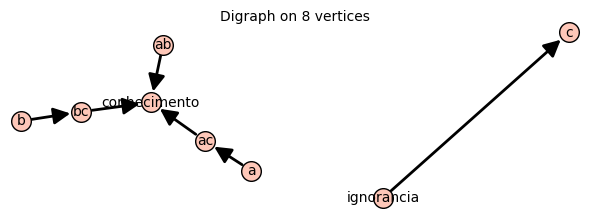

In [23]:
import  wisdomgraph as ws
#reload(ws)
sc = ws.Scenario(scenary)
sc.build_solvercandidates(r=[1])
sc.build_wisdomgraph()
sc.wisdomgraph

In [10]:
sc.allvars

{c, b, a}

In [4]:
#sc.wisdomgraph.plot(edge_labels=True).save("graph.svg",figsize=[100,100], title="Wisdom Graph")
#sc.wisdomgraph.plot(edge_labels=True).show(figsize=[100,100], title="Wisdom Graph")
#P = sc.graph_designer()
#P.show()

In [19]:

def setpos(varlist=[a,b,c], figsize=[10,10]):
    
    nvars = len(varlist)

    comb_length = [ len( Combinations(varlist,i).list() ) for i in range(nvars+1) ]

    #Debug
    #print comb_length #[1, 6, 15, 20, 15, 6, 1]
    maxcomb = max(comb_length) #20

    
    dx = figsize[0] / (nvars-1)
    dy = figsize[1] / (maxcomb-1)
    
    def sx(i):
        return i*dx

    def sy(j,numcases):
        return (j - numcases//2)*dy

    def join_varnames(varlist):
        nname = "".join( sorted( [str(v) for v in varlist] ) )  
        #print("nname = ",nname)
        if nname=="":
            nname = 'ignorancia'
        elif nname == 'abc':
            nname = 'conhecimento'
        return nname




    #maxsize = max( [len(l) for l in comb] )
    #print maxsize

    pos_dic = dict()

    for i in range(nvars+1):

        #Debug
        #print "nvars=",i+1
        
        xpos = sx(i)

        combs = Combinations(varlist,i).list() 
        #Debug
        #print "combs=", combs

        for j in range(comb_length[i]):

            ypos = sy(j,comb_length[i])

            #Debug
            #print join_varnames(combs[j]), " fica em (", xpos, ", ", ypos, ")"
            pos_dic[join_varnames(combs[j])] = [xpos,ypos]

    return pos_dic




pos_dic = setpos()

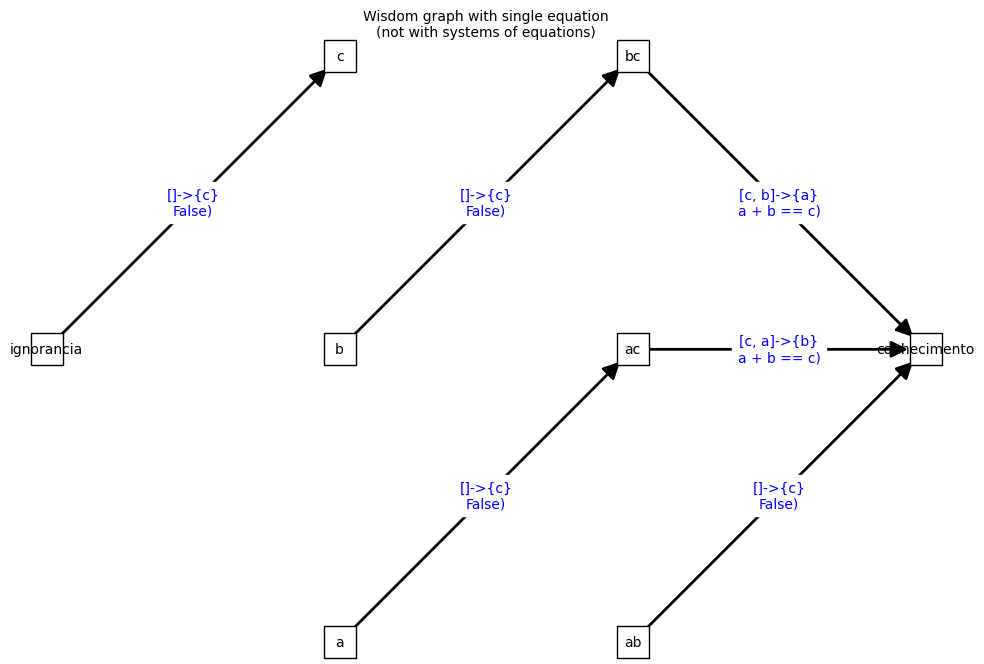

In [20]:
P = sc.wisdomgraph.graphplot(
    
                vertex_size=50,
                vertex_shape="s",
                vertex_labels=True,
                pos = pos_dic,
    
                talk=True,
    
                edge_labels=True,
    
                title="Wisdom graph with single equation\n(not with systems of equations)"
                
)

P.show(figsize=[10,10])        

In [7]:
#sc.solvers

In [26]:
G = sc.wisdomgraph   #.shortest_paths('conhecimento')
P5 = DiGraph( {'0':'1', '1':'2', '2':'3', '3':'4'} )
P6 = DiGraph( {'0':'1', '1':'2', '2':'3', '3':'4', '4':'5'} ) 
P7 = DiGraph( {'0':'1', '1':'2', '2':'3', '3':'4', '4':'5', '5':'6'} ) 
P7 = DiGraph( {'0':'1', '1':'2', '2':'3', '3':'4', '4':'5', '5':'6'} ) 
P9 = DiGraph( {'0':'1', '1':'2', '2':'3', '3':'4', '4':'5', '5':'6', '6': '7', '7': '8', '8': '9'} ) 
Caminhos = P9
lenC = len(Caminhos); print(lenC)

10


In [27]:
from sage.graphs.generic_graph_pyx import SubgraphSearch
S = SubgraphSearch(G,Caminhos)
print(S.cardinality())

#se o vertice nao começa com ignorancia nao interessa nste primeiro estudo
S_start_in_ignorance = [p for p in S if p[0]=='ignorancia' and p[-1]=='conhecimento']
print(len(S_start_in_ignorance))

2496
2496


In [30]:
for g in S_start_in_ignorance:
    print("Trajeto:", g)
    for i in range(lenC-1):
        print("Nivel de conhecimento:", g[i])
        print("   Aplica-se:")
        txtoperadores = G.edge_label(g[i],g[i+1])
        print('\n'.join(" " * 6 + line for line in  txtoperadores.splitlines()))
        



Trajeto: ['ignorancia', 'n11', 'n11n1p', 'n11n12n1p', 'n11n12n1pnp1', 'n11n12n1pn21np1', 'n11n12n1pn21np1npp', 'n11n12n1pn21n2pnp1npp', 'n11n12n1pn21n22n2pnp1npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1p
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1p
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11n12n1pnp1
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21np1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n12n1pn21np1npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn21n2pnp1npp
   Aplica-se:
      [n21, n2p]->{n22}
      n2p == n21 + n22)
Nivel de conhecimento: n11n12n1pn21n22n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp =

   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21np1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pn21np1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21np1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'n11', 'n11n1p', 'n11n1pnp1', 'n11n1pnp1npp', 'n11n1pn21np1npp', 'n11n1pn21np1np2npp', 'n11n1pn21n2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1p
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conheciment

Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21np1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pn21np1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21np1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'n11', 'n11n1p', 'n11n1pnpp', 'n11n1pnp1npp', 'n11n1pn21np1npp', 'n11n1pn21np1np2npp', 'n11n1pn21n2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1p
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n1pnpp
   Aplica-se:
      []->{np1}
    

      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn2pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'n11', 'n11np1', 'n11n1pnp1', 'n11n1pnp1npp', 'n11n1pn2pnp1npp', 'n11n1pn2pnp1np2npp', 'n11n12n1pn2pnp1np2npp', 'n11n12n1pn22n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11np1
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnp1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pn2pnp1np2npp
 

Trajeto: ['ignorancia', 'n11', 'n11np1', 'n11np1npp', 'n11n1pnp1npp', 'n11n1pnp1np2npp', 'n11n1pn2pnp1np2npp', 'n11n12n1pn2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11np1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11np1npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pnp1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn2pnp1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn2pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 =

Nivel de conhecimento: n11npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnpp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn2pnp1npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn2pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'n11', 'n11npp', 'n11n1pnpp', 'n11n1pnp1npp', 'n11n1pn2pnp1npp', 'n11n12n1pn2pnp1npp', 'n11n12n1pn2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11
   Aplica-se:
      []->{npp}
     

Nivel de conhecimento: n11np1np2npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnp1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pnp1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn2pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'n11', 'n11npp', 'n11np1npp', 'n11np1np2npp', 'n11n1pnp1np2npp', 'n11n12n1pnp1np2npp', 'n11n12n1pn2pnp1np2npp', 'n11n12n1pn22n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11npp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11np1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp =

      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pn21n2pnp1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'n1p', 'n11n1p', 'n11n1pnp1', 'n11n1pnp1npp', 'n11n1pn21np1npp', 'n11n1pn21n2pnp1npp', 'n11n1pn21n2pnp1np2npp', 'n11n1pn21n22n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1p
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1p
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11n1pnp1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21np1npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn21n2pnp1npp
 

Trajeto: ['ignorancia', 'n1p', 'n11n1p', 'n11n1pnpp', 'n11n1pnp1npp', 'n11n1pn2pnp1npp', 'n11n1pn21n2pnp1npp', 'n11n12n1pn21n2pnp1npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1p
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1p
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n1pnpp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn2pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21n2pnp1npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 =

Nivel de conhecimento: n1p
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n1pnp1
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pnp1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21np1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn21n2pnp1np2npp
   Aplica-se:
      [n21, n2p]->{n22}
      n2p == n21 + n22)
Nivel de conhecimento: n11n1pn21n22n2pnp1np2npp
   Aplica-se:
      [n22, np2]->{n12}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'n1p', 'n1pnp1', 'n11n1pnp1', 'n11n1pnp1npp', 'n11n1pnp1np2npp', 'n11n1pn2pnp1np2npp', 'n11n12n1pn2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n1p}
    

Nivel de conhecimento: n11n12n1pnpp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn2pnpp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11n12n1pn2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n12n1pn2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Nivel de conhecimento: n11n12n1pn22n2pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Trajeto: ['ignorancia', 'n1p', 'n1pnpp', 'n11n1pnpp', 'n11n12n1pnpp', 'n11n12n1pnp1npp', 'n11n12n1pn21np1npp', 'n11n12n1pn21n2pnp1npp', 'n11n12n1pn21n22n2pnp1npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1p
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n1pnpp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pnpp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p =

      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21n2pnp1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'n1p', 'n1pnpp', 'n1pn2pnpp', 'n11n1pn2pnpp', 'n11n1pn2pnp1npp', 'n11n1pn2pnp1np2npp', 'n11n1pn21n2pnp1np2npp', 'n11n1pn21n22n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1p
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n1pnpp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n1pn2pnpp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pn2pnpp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11n1pn2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pn2pnp1np2npp
 

Trajeto: ['ignorancia', 'n1p', 'n1pnpp', 'n1pnp1npp', 'n1pnp1np2npp', 'n11n1pnp1np2npp', 'n11n1pn2pnp1np2npp', 'n11n1pn21n2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1p
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n1pnpp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n1pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n1pnp1np2npp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pnp1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn2pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21n2pnp1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 =

      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n21np1
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pn21np1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n1pn21np1npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn21n2pnp1npp
   Aplica-se:
      [n21, n2p]->{n22}
      n2p == n21 + n22)
Nivel de conhecimento: n11n1pn21n22n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pn21n22n2pnp1np2npp
   Aplica-se:
      [n22, np2]->{n12}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'np1', 'n11np1', 'n11n21np1', 'n11n1pn21np1', 'n11n1pn21np1npp', 'n11n1pn21n2pnp1npp', 'n11n1pn21n2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: np1
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11np1
 

Nivel de conhecimento: n11np1np2npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnp1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Nivel de conhecimento: n11n12n1pn22np1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21n22np1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Trajeto: ['ignorancia', 'np1', 'n11np1', 'n11np1npp', 'n11np1np2npp', 'n11n1pnp1np2npp', 'n11n12n1pnp1np2npp', 'n11n12n1pn22np1np2npp', 'n11n12n1pn22n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: np1
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11np1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11np1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp =

      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Nivel de conhecimento: n11n12n1pn22n2pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Trajeto: ['ignorancia', 'np1', 'n1pnp1', 'n11n1pnp1', 'n11n1pnp1npp', 'n11n1pnp1np2npp', 'n11n1pn2pnp1np2npp', 'n11n1pn21n2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: np1
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1pnp1
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pnp1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pnp1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn2pnp1np2npp
 

Trajeto: ['ignorancia', 'np1', 'np1npp', 'n11np1npp', 'n11n1pnp1npp', 'n11n12n1pnp1npp', 'n11n12n1pnp1np2npp', 'n11n12n1pn22np1np2npp', 'n11n12n1pn22n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: np1
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: np1npp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11np1npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n12n1pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Nivel de conhecimento: n11n12n1pn22np1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn22n2pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 =

Nivel de conhecimento: np1npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1pnp1npp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21np1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pn21np1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21np1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Nivel de conhecimento: n11n12n1pn21n22np1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Trajeto: ['ignorancia', 'np1', 'np1npp', 'n1pnp1npp', 'n11n1pnp1npp', 'n11n1pn21np1npp', 'n11n1pn21np1np2npp', 'n11n12n1pn21np1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: np1
   Aplica-se:
      []->{npp}
     

Nivel de conhecimento: n11n12n1pnpp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn2pnpp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11n12n1pn2pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'npp', 'n11npp', 'n11n1pnpp', 'n11n12n1pnpp', 'n11n12n1pn2pnpp', 'n11n12n1pn2pnp1npp', 'n11n12n1pn2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: npp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnpp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p =

      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn21n2pnp1npp
   Aplica-se:
      [n21, n2p]->{n22}
      n2p == n21 + n22)
Nivel de conhecimento: n11n12n1pn21n22n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Trajeto: ['ignorancia', 'npp', 'n11npp', 'n11np1npp', 'n11n1pnp1npp', 'n11n1pn21np1npp', 'n11n12n1pn21np1npp', 'n11n12n1pn21n2pnp1npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: npp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11npp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11np1npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21np1npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21np1npp
 

      [npp, np1]->{np2}
      npp == np1 + np2)
Trajeto: ['ignorancia', 'npp', 'n1pnpp', 'n11n1pnpp', 'n11n1pn2pnpp', 'n11n1pn2pnp1npp', 'n11n1pn21n2pnp1npp', 'n11n12n1pn21n2pnp1npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1pnpp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pnpp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn2pnpp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n11n1pn2pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21n2pnp1npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pn21n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
 

      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn21n2pnp1npp
   Aplica-se:
      [n21, n2p]->{n22}
      n2p == n21 + n22)
Nivel de conhecimento: n11n12n1pn21n22n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Trajeto: ['ignorancia', 'npp', 'n1pnpp', 'n1pnp1npp', 'n11n1pnp1npp', 'n11n12n1pnp1npp', 'n11n12n1pn21np1npp', 'n11n12n1pn21n2pnp1npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1pnpp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: n1pnp1npp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21np1npp
 

Nivel de conhecimento: n11np1npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n12n1pnp1np2npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n12n1pn21np1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n12n1pn21n2pnp1np2npp
   Aplica-se:
      [n12, np2]->{n22}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'npp', 'np1npp', 'n11np1npp', 'n11n1pnp1npp', 'n11n12n1pnp1npp', 'n11n12n1pnp1np2npp', 'n11n12n1pn22np1np2npp', 'n11n12n1pn21n22np1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: npp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: np1npp
   Aplica-se:
      []->{n11}
    

Trajeto: ['ignorancia', 'npp', 'np1npp', 'n1pnp1npp', 'n11n1pnp1npp', 'n11n1pn21np1npp', 'n11n1pn21n2pnp1npp', 'n11n1pn21n22n2pnp1npp', 'n11n1pn21n22n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: npp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: np1npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1pnp1npp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pnp1npp
   Aplica-se:
      [n11, np1]->{n21}
      np1 == n11 + n21)
Nivel de conhecimento: n11n1pn21np1npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n11n1pn21n2pnp1npp
   Aplica-se:
      [n21, n2p]->{n22}
      n2p == n21 + n22)
Nivel de conhecimento: n11n1pn21n22n2pnp1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: n11n1pn21n22n2pnp1np2npp
   Aplica-se:
      [n22, np2]->{n12}
      np2 =

   Aplica-se:
      [n21, n2p]->{n22}
      n2p == n21 + n22)
Nivel de conhecimento: n11n1pn21n22n2pnp1np2npp
   Aplica-se:
      [n22, np2]->{n12}
      np2 == n12 + n22)
Trajeto: ['ignorancia', 'npp', 'np1npp', 'np1np2npp', 'n1pnp1np2npp', 'n1pn2pnp1np2npp', 'n11n1pn2pnp1np2npp', 'n11n12n1pn2pnp1np2npp', 'n11n12n1pn21n2pnp1np2npp', 'conhecimento']
Nivel de conhecimento: ignorancia
   Aplica-se:
      []->{npp}
      npp == 100)
Nivel de conhecimento: npp
   Aplica-se:
      []->{np1}
      np1 == 80)
Nivel de conhecimento: np1npp
   Aplica-se:
      [npp, np1]->{np2}
      npp == np1 + np2)
Nivel de conhecimento: np1np2npp
   Aplica-se:
      []->{n1p}
      n1p == 30)
Nivel de conhecimento: n1pnp1np2npp
   Aplica-se:
      [n1p, npp]->{n2p}
      npp == n1p + n2p)
Nivel de conhecimento: n1pn2pnp1np2npp
   Aplica-se:
      []->{n11}
      n11 == 20)
Nivel de conhecimento: n11n1pn2pnp1np2npp
   Aplica-se:
      [n1p, n11]->{n12}
      n1p == n11 + n12)
Nivel de conhecimento: n11n12n1p

In [12]:
PS = GS.graphplot(
    
                vertex_size=50,
                vertex_shape="s",
                vertex_labels=True,
                pos = pos_dic,
    
                talk=True,
    
                edge_labels=True,
    
                title="Wisdom graph with single equation\n(not with systems of equations)"
                
)

PS.show(figsize=[20,20]) 

NameError: name 'GS' is not defined

In [ ]:
x = {a,b}

In [ ]:
type(x)

In [ ]:
ls -l